#**Tweet Sentiment Analysis using RNN and LSTM**

In [121]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

In [122]:
df = pd.read_csv('/content/TweetSentiment_60.csv', on_bad_lines='skip')
df

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
127796,4,@jessikasay congrats on the followers
127797,4,@dannywood As in &quot;back dat ass on up in h...
127798,4,School In about 12 minutes then I get picked u...
127799,4,@itsMeeeech -- sounds fun!


#Text Pre-processing

In [123]:
df["tweet"] = df["tweet"].astype(str) # making all column string

###**Lower Casing**

In [124]:
df["processed_tweets"] = df["tweet"].str.lower()
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [125]:


print("\nOriginal Tweet:",df['tweet'][0]) #first latters capital 
print(df['processed_tweets'][0])  #first latters small



Original Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d


In [126]:
len(df['processed_tweets'])

127801

###**Removal of @ and User names**

<!-- Tokenization -->

In [127]:
tknzr = TweetTokenizer(strip_handles=True) # TweetTokenizer func() to remove twiter handler @ and User names

for a in range(len(df['processed_tweets'])):

  result = tknzr.tokenize(df['processed_tweets'][a])
  res=" ".join(result)
  df['processed_tweets'][a]=res
print("\nTokenize a twitter text:")
print(df['processed_tweets'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



Tokenize a twitter text:
0         http://twitpic.com/2y1zl - awww , that's a bum...
1         is upset that he can't update his facebook by ...
2         i dived many times for the ball . managed to s...
3            my whole body feels itchy and like its on fire
4         no , it's not behaving at all . i'm mad . why ...
                                ...                        
127796                            congrats on the followers
127797    as in " back dat ass on up in here for some fu...
127798    school in about 12 minutes then i get picked u...
127799                                     - - sounds fun !
127800    good morning everyone welcome to my new follow...
Name: processed_tweets, Length: 127801, dtype: object


In [128]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww , that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no , it's not behaving at all . i'm mad . why ..."


###**Remove Punctuations**

In [129]:
# drop the new column created in last cell

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["processed_tweets"] = df["processed_tweets"].apply(lambda text: remove_punctuation(text)) # all punchuations removed
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccom2y1zl awww thats a bummer you...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


###**Remove URLs**

In [130]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)

In [131]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = remove_URL(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No URLs:")
print(result)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No URLs:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [132]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


###**Remove Emojis**

In [133]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [134]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoji(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


###**Removal of Emoticons¶**


In [135]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [136]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [137]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoticons(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No Emoticons:")
print(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No Emoticons:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [138]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


In [139]:
df.isna().sum()

target              0
tweet               0
processed_tweets    0
dtype: int64

### **Labelling the target fileds**

In [140]:
df['target'].value_counts()

4    74609
0    53192
Name: target, dtype: int64

0 --> negative, 

4 --> Positive

In [141]:
df['Target']=df['target'].replace(4,1) # replacing 4,1 with 1,0 1 represent the +ve tweet
df['Target'].value_counts()

1    74609
0    53192
Name: Target, dtype: int64

0 --> negative, 

1 --> Positive

[Reference for maxlen](https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do)

In [142]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

###**Stop words**

In [143]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [144]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function   
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [145]:
dataset = df.drop('tweet',axis=1)
dataset

,target,processed_tweets,Target
0,0,awww thats bummer shoulda got david carr third...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,dived many times ball managed save 50 rest go ...,0
3,0,whole body feels itchy like fire,0
4,0,no not behaving im mad cant see over,0
...,...,...,...
127796,4,congrats followers,1
127797,4,back dat ass full service,1
127798,4,school 12 minutes get picked morgan,1
127799,4,sounds fun,1


###**Stemming**

In [146]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['processed_tweets']= df['processed_tweets'].apply(lambda x: stemming_on_text(x))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

###**Lammentization**

In [147]:
# import nltk
# nltk.download('wordnet')
import nltk
nltk.download('all')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatizer_on_text(x))
df['processed_tweets'].head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [148]:
X = df['processed_tweets']
y = df['Target']

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.1) # using 10% data
print(X_train.shape)
print(X_test.shape)

(115020,)
(12781,)


In [150]:
print(y_train.shape)
print(y_test.shape)

(115020,)
(12781,)


In [151]:
X_test

96233    well wasnt good news got june 18th find anothe...
60620    ok fine ate one shall return freezer good nigh...
76756                                good morning everyone
45696    dont forget read blog yesterday theres new one...
87297                               yesterday crazyy hahah
                               ...                        
12717                            absolutely hate get tweet
27895    late no one wanted go people need widen verizo...
8379     ru arent even working office anymore still get...
65012                          thanks replay lets give try
89704              ack monday morning no coffee sounds bad
Name: processed_tweets, Length: 12781, dtype: object

##**Text Sequencing**

In [152]:

# tokenize and sequence sentence# that convert all tests into number sequence 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[22, 305, 4, 373, 17, 954, 2837, 127, 107, 276, 390, 19020, 52973],
 [100, 429, 670, 20, 682, 1183, 4606, 4, 26, 72, 2839],
 [4, 24, 106],
 [15, 724, 232, 292, 182, 293, 29, 20, 162, 9296, 9],
 [182, 18216, 1030],
 [134, 293, 175, 356, 6206, 2, 165, 3, 452, 38],
 [585, 262, 8014, 31, 839, 1178],
 [355, 227, 1686, 67, 52974],
 [430, 51, 873, 469, 1583, 3955],
 [118, 4962, 281, 12082, 695, 126, 1172, 6541, 375, 26],
 [52975, 15, 1580, 32, 212, 237, 60, 63, 18033, 137, 10, 100, 317],
 [1337, 977, 523, 2441, 806, 4, 589, 870],
 [10, 455, 220, 259, 12, 6265, 5, 149, 92, 1586, 1735, 9],
 [403, 468, 67, 1803, 1101],
 [11633, 46, 296, 1336, 1031, 1801, 90, 25512, 499, 54],
 [731, 5],
 [142, 473, 830, 634, 422, 5, 181, 19, 1190, 1734, 19145],
 [28],
 [78, 2, 530, 172, 1040, 304, 20, 427, 15566, 637, 454, 10647],
 [320, 240, 29, 531, 1590, 99, 2301, 604, 2, 66, 175],
 [245, 84, 2159],
 [19, 11, 31425, 292],
 [591, 25981, 23, 366, 4395, 606, 1265, 732],
 [355, 225, 52976],
 [2043, 352, 772, 19, 

In [153]:
# print('Maximum tweet length: {}'.format(
# len((max((train_text_vec + test_text_vec), key=len)))))

In [154]:
#checking the next maximum number
lenght = []
for i in (train_text_vec + test_text_vec):
  if  10<len(i)<28:
    lenght.append(len(i))
max(lenght)

27

We can leave the maximum word length to 28

In [155]:
## train['processed_tweets'].apply(lambda x : len(x.split(' '))).quantile(0.95)

In [156]:
# pad the sequences

from keras.preprocessing import sequence
max_words = 28
X_train = sequence.pad_sequences(train_text_vec, maxlen=max_words)
X_test = sequence.pad_sequences(test_text_vec, maxlen=max_words)
# modelCNN = None
modelRNN=None
modelLSTM=None
print ("After Padding X[train[0]=\n", X_test[0])

After Padding X[train[0]=
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0    22   305     4   373    17   954  2837   127   107
   276   390 19020 52973]


<br>

**End of Data Preprocessing!!**



##**Modelling**

In [157]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55309 unique tokens.


In [158]:
len((train_text_vec + test_text_vec))*2

255602

In [159]:

vocabulary_size = len((train_text_vec + test_text_vec))*2

#Glove Embeddings

In [160]:
#Glove
embeddings_index = {}
f = open('/content/glove.6B.100d.txt') # 6 billion glove words 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 398759 word vectors.


In [161]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word,i in tqdm(token.word_index.items()):
#     embedding_value = embedding_vector.get(word)
#     if embedding_value is not None:
#         embedding_matrix[i] = embedding_value

In [162]:
#embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
# embedding_matrix.shape

#Recurrent Neural Network(RNN)

In [163]:
#Now create a simple RNN model and lets see the accuracy
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [164]:
embedding_size=100


modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size,embedding_size,weights = [embedding_matrix],input_length=28)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01)))  # 150 neurons
#Tanh Activation is an activation function used for neural networks: f ( x ) = e x − e − x e x + e − x. Historically, the tanh function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks.
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 28, 100)           25560200  
                                                                 
 dropout_4 (Dropout)         (None, 28, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 25,598,001
Trainable params: 25,598,001
Non-trainable params: 0
_________________________________________________________________
None


In [165]:
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [166]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [167]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listRNN)
modelRNN.save_weights("my_modRNN_Latest")

Epoch 1/20
112/112 [==============================] - ETA: 0s - loss: 1.2432 - accuracy: 0.5728

112/112 [==============================] - 6s 44ms/step - loss: 1.2432 - accuracy: 0.5728 - val_loss: 0.8581 - val_accuracy: 0.5723
Epoch 2/20
111/112 [============================>.] - ETA: 0s - loss: 0.7177 - accuracy: 0.6270

112/112 [==============================] - 5s 43ms/step - loss: 0.7176 - accuracy: 0.6270 - val_loss: 0.6615 - val_accuracy: 0.6270
Epoch 3/20
111/112 [============================>.] - ETA: 0s - loss: 0.6148 - accuracy: 0.6773

112/112 [==============================] - 5s 44ms/step - loss: 0.6147 - accuracy: 0.6774 - val_loss: 0.5547 - val_accuracy: 0.7314
Epoch 4/20
111/112 [============================>.] - ETA: 0s - loss: 0.5682 - accuracy: 0.7152

112/112 [==============================] - 5s 42ms/step - loss: 0.5682 - accuracy: 0.7151 - val_loss: 0.5257 - val_accuracy: 0.7500
Epoch 5/20
112/112 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.7346

112/112 [==============================] - 5s 44ms/step - loss: 0.5394 - accuracy: 0.7346 - val_loss: 0.5112 - val_accuracy: 0.7627
Epoch 6/20
111/112 [============================>.] - ETA: 0s - loss: 0.5165 - accuracy: 0.7528

112/112 [==============================] - 5s 43ms/step - loss: 0.5165 - accuracy: 0.7527 - val_loss: 0.5050 - val_accuracy: 0.7578
Epoch 7/20
111/112 [============================>.] - ETA: 0s - loss: 0.4993 - accuracy: 0.7635

112/112 [==============================] - 5s 43ms/step - loss: 0.4992 - accuracy: 0.7635 - val_loss: 0.4855 - val_accuracy: 0.7744
Epoch 8/20
111/112 [============================>.] - ETA: 0s - loss: 0.4862 - accuracy: 0.7714

112/112 [==============================] - 5s 43ms/step - loss: 0.4862 - accuracy: 0.7715 - val_loss: 0.4831 - val_accuracy: 0.7754
Epoch 9/20
112/112 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.7819

112/112 [==============================] - 5s 42ms/step - loss: 0.4726 - accuracy: 0.7819 - val_loss: 0.4765 - val_accuracy: 0.7891
Epoch 10/20
111/112 [============================>.] - ETA: 0s - loss: 0.4654 - accuracy: 0.7856

112/112 [==============================] - 5s 43ms/step - loss: 0.4653 - accuracy: 0.7856 - val_loss: 0.4723 - val_accuracy: 0.7881
Epoch 11/20
111/112 [============================>.] - ETA: 0s - loss: 0.4559 - accuracy: 0.7923

112/112 [==============================] - 5s 41ms/step - loss: 0.4558 - accuracy: 0.7924 - val_loss: 0.4673 - val_accuracy: 0.7930
Epoch 12/20
111/112 [============================>.] - ETA: 0s - loss: 0.4457 - accuracy: 0.7976

112/112 [==============================] - 5s 42ms/step - loss: 0.4457 - accuracy: 0.7977 - val_loss: 0.4578 - val_accuracy: 0.8018
Epoch 13/20
112/112 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8034

112/112 [==============================] - 5s 43ms/step - loss: 0.4393 - accuracy: 0.8034 - val_loss: 0.4641 - val_accuracy: 0.7949
Epoch 14/20
112/112 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.8076

112/112 [==============================] - 5s 43ms/step - loss: 0.4308 - accuracy: 0.8076 - val_loss: 0.4676 - val_accuracy: 0.7881
Epoch 15/20
112/112 [==============================] - ETA: 0s - loss: 0.4256 - accuracy: 0.8100

112/112 [==============================] - 5s 42ms/step - loss: 0.4256 - accuracy: 0.8100 - val_loss: 0.4579 - val_accuracy: 0.7949
Epoch 16/20
112/112 [==============================] - ETA: 0s - loss: 0.4174 - accuracy: 0.8148

112/112 [==============================] - 5s 42ms/step - loss: 0.4174 - accuracy: 0.8148 - val_loss: 0.4538 - val_accuracy: 0.7959
Epoch 17/20
111/112 [============================>.] - ETA: 0s - loss: 0.4117 - accuracy: 0.8195

112/112 [==============================] - 5s 42ms/step - loss: 0.4115 - accuracy: 0.8196 - val_loss: 0.4489 - val_accuracy: 0.8193
Epoch 18/20
111/112 [============================>.] - ETA: 0s - loss: 0.4104 - accuracy: 0.8204

112/112 [==============================] - 5s 42ms/step - loss: 0.4103 - accuracy: 0.8204 - val_loss: 0.4585 - val_accuracy: 0.7998
Epoch 19/20
112/112 [==============================] - ETA: 0s - loss: 0.3987 - accuracy: 0.8279

112/112 [==============================] - 5s 43ms/step - loss: 0.3987 - accuracy: 0.8279 - val_loss: 0.4510 - val_accuracy: 0.8105
Epoch 20/20
112/112 [==============================] - ETA: 0s - loss: 0.3948 - accuracy: 0.8287

112/112 [==============================] - 5s 44ms/step - loss: 0.3948 - accuracy: 0.8287 - val_loss: 0.4524 - val_accuracy: 0.7988


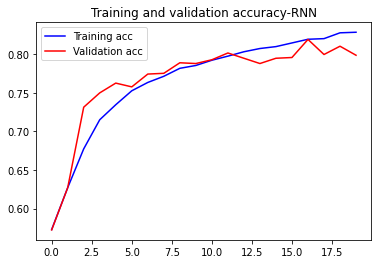

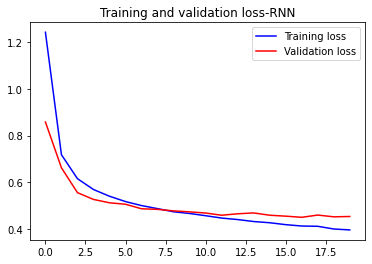

In [168]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()
 
plt.show()

#Loading the last epoch modeln (Optional)

In [169]:
#Loading the last epoch model
# remember that increase the epoches decrease the complexcity
modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh")) 
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
modelRNN.load_weights("my_modRNN_Latest")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 28, 100)           25560200  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 25,598,001
Trainable params: 25,598,001
Non-trainable params: 0
_________________________________________________________________


None


<br>

#LSTM

In [170]:
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modLSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [171]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [172]:
embedding_size=100
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size,100,weights = [embedding_matrix],input_length=28)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(Dropout(0.70))
modelLSTM.add(LSTM(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelLSTM.add(Dropout(0.15))
modelLSTM.add(Dense(1, activation='sigmoid'))
print(modelLSTM.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 28, 100)           25560200  
                                                                 
 dropout_6 (Dropout)         (None, 28, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 25,710,951
Trainable params: 25,710,951
Non-trainable params: 0
_________________________________________________________________
None


In [173]:
modelLSTM.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [174]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [175]:
LSTMhistory = modelLSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listLSTM)
modelLSTM.save_weights("my_modLSTM_Latest")

Epoch 1/20
111/112 [============================>.] - ETA: 0s - loss: 1.0888 - accuracy: 0.6029

112/112 [==============================] - 5s 32ms/step - loss: 1.0876 - accuracy: 0.6032 - val_loss: 0.6409 - val_accuracy: 0.6494
Epoch 2/20
111/112 [============================>.] - ETA: 0s - loss: 0.6120 - accuracy: 0.6732

112/112 [==============================] - 3s 28ms/step - loss: 0.6119 - accuracy: 0.6733 - val_loss: 0.5587 - val_accuracy: 0.7188
Epoch 3/20
111/112 [============================>.] - ETA: 0s - loss: 0.5605 - accuracy: 0.7181

112/112 [==============================] - 3s 28ms/step - loss: 0.5605 - accuracy: 0.7181 - val_loss: 0.5234 - val_accuracy: 0.7500
Epoch 4/20
111/112 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7412

112/112 [==============================] - 3s 28ms/step - loss: 0.5277 - accuracy: 0.7413 - val_loss: 0.5002 - val_accuracy: 0.7783
Epoch 5/20
111/112 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.7568

112/112 [==============================] - 3s 28ms/step - loss: 0.5078 - accuracy: 0.7568 - val_loss: 0.4872 - val_accuracy: 0.7832
Epoch 6/20
111/112 [============================>.] - ETA: 0s - loss: 0.4898 - accuracy: 0.7674

112/112 [==============================] - 3s 28ms/step - loss: 0.4896 - accuracy: 0.7674 - val_loss: 0.4795 - val_accuracy: 0.7881
Epoch 7/20
111/112 [============================>.] - ETA: 0s - loss: 0.4765 - accuracy: 0.7769

112/112 [==============================] - 3s 28ms/step - loss: 0.4764 - accuracy: 0.7770 - val_loss: 0.4717 - val_accuracy: 0.7969
Epoch 8/20
111/112 [============================>.] - ETA: 0s - loss: 0.4645 - accuracy: 0.7833

112/112 [==============================] - 3s 28ms/step - loss: 0.4644 - accuracy: 0.7833 - val_loss: 0.4665 - val_accuracy: 0.7910
Epoch 9/20
111/112 [============================>.] - ETA: 0s - loss: 0.4540 - accuracy: 0.7909

112/112 [==============================] - 3s 28ms/step - loss: 0.4539 - accuracy: 0.7909 - val_loss: 0.4674 - val_accuracy: 0.7959
Epoch 10/20
111/112 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7977

112/112 [==============================] - 3s 28ms/step - loss: 0.4443 - accuracy: 0.7977 - val_loss: 0.4599 - val_accuracy: 0.7969
Epoch 11/20
111/112 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8021

112/112 [==============================] - 3s 28ms/step - loss: 0.4363 - accuracy: 0.8020 - val_loss: 0.4665 - val_accuracy: 0.7949
Epoch 12/20
111/112 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.8071

112/112 [==============================] - 3s 28ms/step - loss: 0.4297 - accuracy: 0.8070 - val_loss: 0.4557 - val_accuracy: 0.8027
Epoch 13/20
111/112 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8112

112/112 [==============================] - 3s 28ms/step - loss: 0.4208 - accuracy: 0.8111 - val_loss: 0.4634 - val_accuracy: 0.7959
Epoch 14/20
111/112 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8166

112/112 [==============================] - 3s 28ms/step - loss: 0.4127 - accuracy: 0.8165 - val_loss: 0.4594 - val_accuracy: 0.7998
Epoch 15/20
111/112 [============================>.] - ETA: 0s - loss: 0.4062 - accuracy: 0.8198

112/112 [==============================] - 3s 28ms/step - loss: 0.4062 - accuracy: 0.8198 - val_loss: 0.4526 - val_accuracy: 0.8018
Epoch 16/20
111/112 [============================>.] - ETA: 0s - loss: 0.3994 - accuracy: 0.8249

112/112 [==============================] - 3s 28ms/step - loss: 0.3993 - accuracy: 0.8250 - val_loss: 0.4478 - val_accuracy: 0.8125
Epoch 17/20
111/112 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8285

112/112 [==============================] - 3s 28ms/step - loss: 0.3941 - accuracy: 0.8286 - val_loss: 0.4517 - val_accuracy: 0.8037
Epoch 18/20
111/112 [============================>.] - ETA: 0s - loss: 0.3863 - accuracy: 0.8322

112/112 [==============================] - 3s 28ms/step - loss: 0.3864 - accuracy: 0.8322 - val_loss: 0.4572 - val_accuracy: 0.8027
Epoch 19/20
111/112 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.8346

112/112 [==============================] - 3s 28ms/step - loss: 0.3822 - accuracy: 0.8345 - val_loss: 0.4436 - val_accuracy: 0.8096
Epoch 20/20
111/112 [============================>.] - ETA: 0s - loss: 0.3751 - accuracy: 0.8384

112/112 [==============================] - 3s 28ms/step - loss: 0.3750 - accuracy: 0.8385 - val_loss: 0.4432 - val_accuracy: 0.8154


##**Performance Measure**

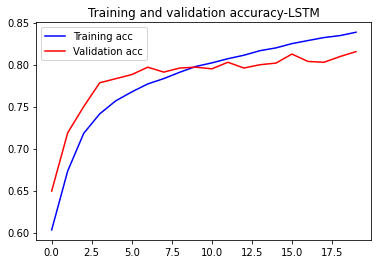

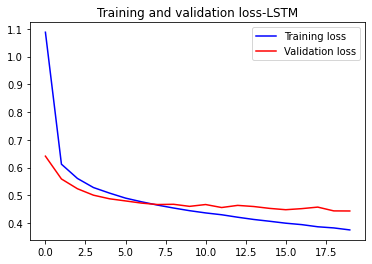

In [176]:
import matplotlib.pyplot as plt
acc = modelLSTM.history.history['accuracy']
val_acc = modelLSTM.history.history['val_accuracy']
loss = modelLSTM.history.history['loss']
val_loss = modelLSTM.history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-LSTM')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-LSTM')
plt.legend()
 
plt.show()

###**Confusion matrix and classification_report**

In [177]:
from sklearn.metrics import classification_report, confusion_matrix

In [178]:
cf_matrix=confusion_matrix(y_test, y_predict.round())

NameError: ignored

In [ ]:
y_predict = modelRNN.predict(X_test)
print(classification_report(y_test, y_predict.round()))

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

##**Custom Tweet For Extra Test**

In [ ]:
test_data=['today is a sad day','he was happy today','not a good job']

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=28)
x_test

In [ ]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  if res[i]>0.3:
    print('Sentiment type:Positive',res[i])
  else:
    print('Sentiment type:Negative',res[i])
  print('==================================================\n')

###**Building a function to convert words into vector**

In [ ]:
#pre- processing custom tweets ()
def preprocess_tweets(tweet):
    #fo = open('/content/stopwords.txt', "r+")
    #stop_words = list(fo.read().split(','))
    #translation={39:None}
    processed_tweet = tweet
    processed_tweet=re.sub('\d+', '',tweet)
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(STOPWORDS))
    
    return(processed_tweet)

In [ ]:
def tweet_to_vector(text):
  print('Original tweet:-',text)
  text=preprocess_tweets(text)
  print('Processed tweet:- '+text)
  text=text.split(' ')
  tokenizer = Tokenizer(lower=False)
  tokenizer.fit_on_texts(text)
  text_vec = tokenizer.texts_to_sequences(text)
  word_index = tokenizer.word_index
  print(word_index)
  print('==================================================')
  embeddings_index = {}
  f = open('/content/glove.6B.100d.txt')
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    if word in word_index.keys():  
      embeddings_index[word] = coefs
  for notw in word_index.keys():
    if notw not in embeddings_index.keys():
      embeddings_index[notw] = 'unknown'
  f.close()
  print('Vector for each word in processed tweet')
  print(embeddings_index)

In [ ]:
custom_tweet='@meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest'
custom_tweets= tweet_to_vector(custom_tweet)

In [ ]:
# cont_y_test = []
# for i in y_test:
#   i = float(i)
#   cont_y_test.append(i) 

